<a href="https://colab.research.google.com/github/Toeysamm/2-64-NIDA-DADS5001/blob/main/04_Apply/Detailed_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detailed EDA and grade prediction using XGBoost
#####by EKARAT RATTAGAN · COPIED FROM RUSLAN SIKHAMOV +12,-1 · 2MO AGO · 196 VIEWS

Student Alcohol Consumption. Detailed EDA and grade prediction.

The data were obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students.

The goals of the present work are:
1. Estimate the factors affecting grade of students.
2. Estimate the level of alcohol consumption among students.
3. Build a machine learning model which is able to predict grade of students based on the available features.

The original dataset consists of two parts: students that study math and students that study the Portuguese language. In this notebook we will consider only the first part - students studying math.

Source - https://www.kaggle.com/uciml/student-alcohol-consumption

##First look at the data
First of all, let's import the libraries we will need.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
pd.options.display.max_columns=33

Then we can create a dataframe and have a look at it.

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv')

In [39]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [41]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. The dataset includes information about 395 students.
2. There are 33 features. The majority of them are categorical variables. Some variables look numerical, but in fact, they are categorical. For example, Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education). There are only 5 real numerical features - age, absences, and grades (G1, G2, G3).
3. There are no missing values.

#EDA
First of all, we have to highlight the goals of our research:
1. Understand, which features affect the grades of students.
2. Assess the influence of alcohol consumption on the grades.

###General familiarization with the data
In this paragraph, I would like to have a look at the target (grades), at some basic features (age, sex, etc.) and at the level of alcohol consumption to get an understanding of the dataset we have. We will consider several features (which can affect the target and alcohol consumption based on my prejudiced opinion) and their influence on the target and alcohol consumption. A more precise investigation of all features will be done in the next paragraph.

###Distributions
In the dataset we have students from 2 different schools. Let's have a look, how many students they have.

In [42]:
print(type(df['school'].value_counts()))
print(type(df['school'].value_counts().to_frame()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [43]:
pd.concat([df['school'].value_counts().to_frame(), df['school'].value_counts(normalize=True).to_frame()], axis=1)

,school,school
GP,349,0.883544
MS,46,0.116456


88% of students belong to Gabriel Pereira school, the rest belong to Mousinho da Silveira school.

Let's have a look at the age of students.

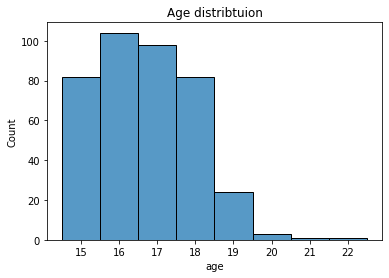

In [44]:
sns.histplot(df.age, bins=8, discrete=True)
plt.title('Age distribtuion')
plt.show()

The age of majority of students is in the range between 15 and 18. The oldest students are 22 years old.

Another basic features is gender.

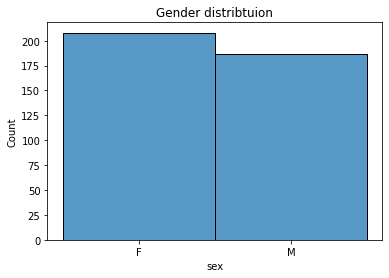

In [45]:
sns.histplot(df.sex)
plt.title('Gender distribtuion')
plt.show()

In our dataset, there are a bit more females than males.

Now we will consider the feature Dalc. It shows a workday alcohol consumption (from 1 - very low to 5 - very high).

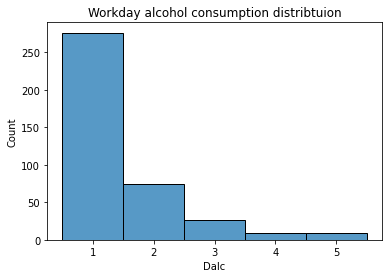

In [46]:
sns.histplot(df.Dalc, discrete=True)
plt.title('Workday alcohol consumption distribtuion')
plt.show()

In [47]:
df['Dalc'].value_counts(normalize=True)

1    0.698734
2    0.189873
3    0.065823
5    0.022785
4    0.022785
Name: Dalc, dtype: float64

From that we can conclude that the majority of students (almost 70%) do not drink alcohol during the week (1 in *Dalc* means very low consumption. It's weird that there is no choice of 0 meaning "no alcohol at all'. Since it's unrealistic to assume that every student drinks alcohol, in this notebook we will consider "very low consumption" as "no alcohol"). 19% drink a bit more than nothing, 2.5% drink a lot during the week.

Another important feature is Walc - weekend alcohol consumption.

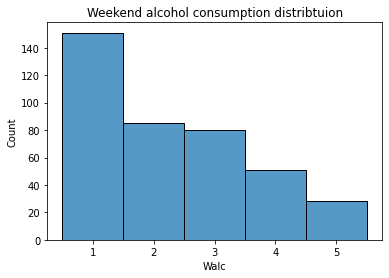

In [48]:
sns.histplot(df.Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

In [49]:
df['Walc'].value_counts(normalize=True)

1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: Walc, dtype: float64

Here the situation changes completely. It seems like students start drinking on the weekend.

Also, it's interesting to see, **how many students, that do not drink alcohol during the week, drink alcohol on the weekend.**

In [50]:
df[df['Dalc'] == 1]['Walc'].value_counts(normalize=True)

1    0.543478
2    0.235507
3    0.152174
4    0.054348
5    0.014493
Name: Walc, dtype: float64

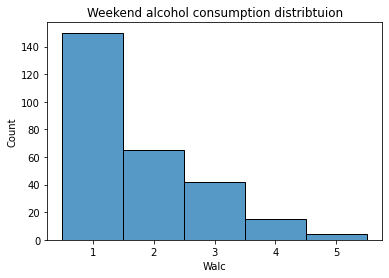

In [51]:
sns.histplot(df[df['Dalc'] == 1].Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

More than 45%.

Another interesting feature could be absences.

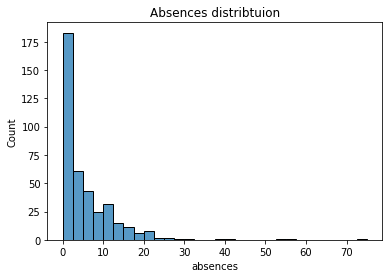

In [52]:
sns.histplot(df['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

In [53]:
df['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

Most students either do not have a lot of absences or have 0 absences at all. But there are some unique students that have more than 30 absences.

Now, we can go to our target - grades.

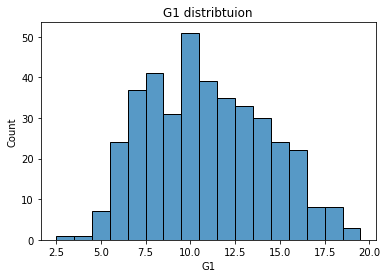

In [54]:
sns.histplot(df['G1'], discrete=True)
plt.title('G1 distribtuion')
plt.show()

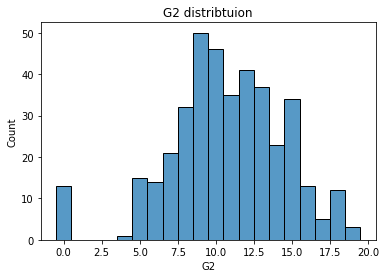

In [55]:
sns.histplot(df['G2'], discrete=True)
plt.title('G2 distribtuion')
plt.show()

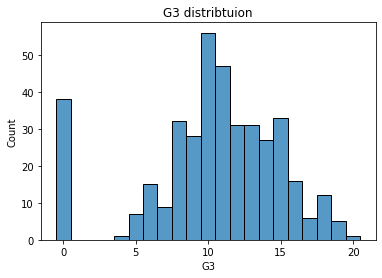

In [56]:
sns.histplot(df['G3'], discrete=True)
plt.title('G3 distribtuion')
plt.show()